In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
import matplotlib.image

In [2]:
path_result = "../result/"
GROUPBY_folder = ["Groupby_3_result", "Groupby_5_result", "Groupby_7_result", "Groupby_9_result", "Groupby_11_result"]

We start by plotting the result of the model without augmented images

In [3]:

GROUPBY_list = [3,5,7,9,11]
ALL_MASK_list = [[0,1,2],
            [0,1,2,3,4],
            [0,2,3,5,6],
            [0,2,4,6,8],
            [0,3,5,7,10]
          ]

json_groupby = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric.json")
    
    json_groupby.append(tmp)

In [4]:
all_result = []
for i, group in enumerate(GROUPBY_list):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder[i],json_groupby[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result.append(tmp)    

In [5]:
tt = all_result[0][0]
tt.reset_index()

,index,train_accuracy,train_loss,train_IoU,train_epoch_time,val_accuracy,val_loss,val_IoU,val_epoch_time
0,0,93.672818,0.688637,70.110500,49.303835,99.135762,0.688424,89.510298,24.155286
1,1,98.569763,0.685220,89.337373,14.310333,99.097437,0.687171,89.197922,2.261681
2,2,98.441720,0.685202,88.581038,14.301093,99.280274,0.687284,90.960735,2.244446
3,3,97.245151,0.683710,82.474649,14.180998,99.331295,0.686637,91.566211,2.255283
4,4,95.262033,0.682539,75.088978,14.305747,99.187320,0.685622,90.071261,2.281840
5,5,97.631258,0.682450,84.304380,14.213085,99.256140,0.685001,90.892804,2.264058
6,6,97.148889,0.682444,82.061934,14.374071,99.196774,0.686234,90.164679,2.289793
7,7,97.282088,0.682412,82.681048,14.314646,99.298030,0.685332,91.236579,2.250361
8,8,96.714485,0.682412,80.235064,14.375110,99.191731,0.685728,90.160340,2.288292
9,9,95.791292,0.682531,76.804709,14.280945,99.237281,0.684543,90.740454,2.241076


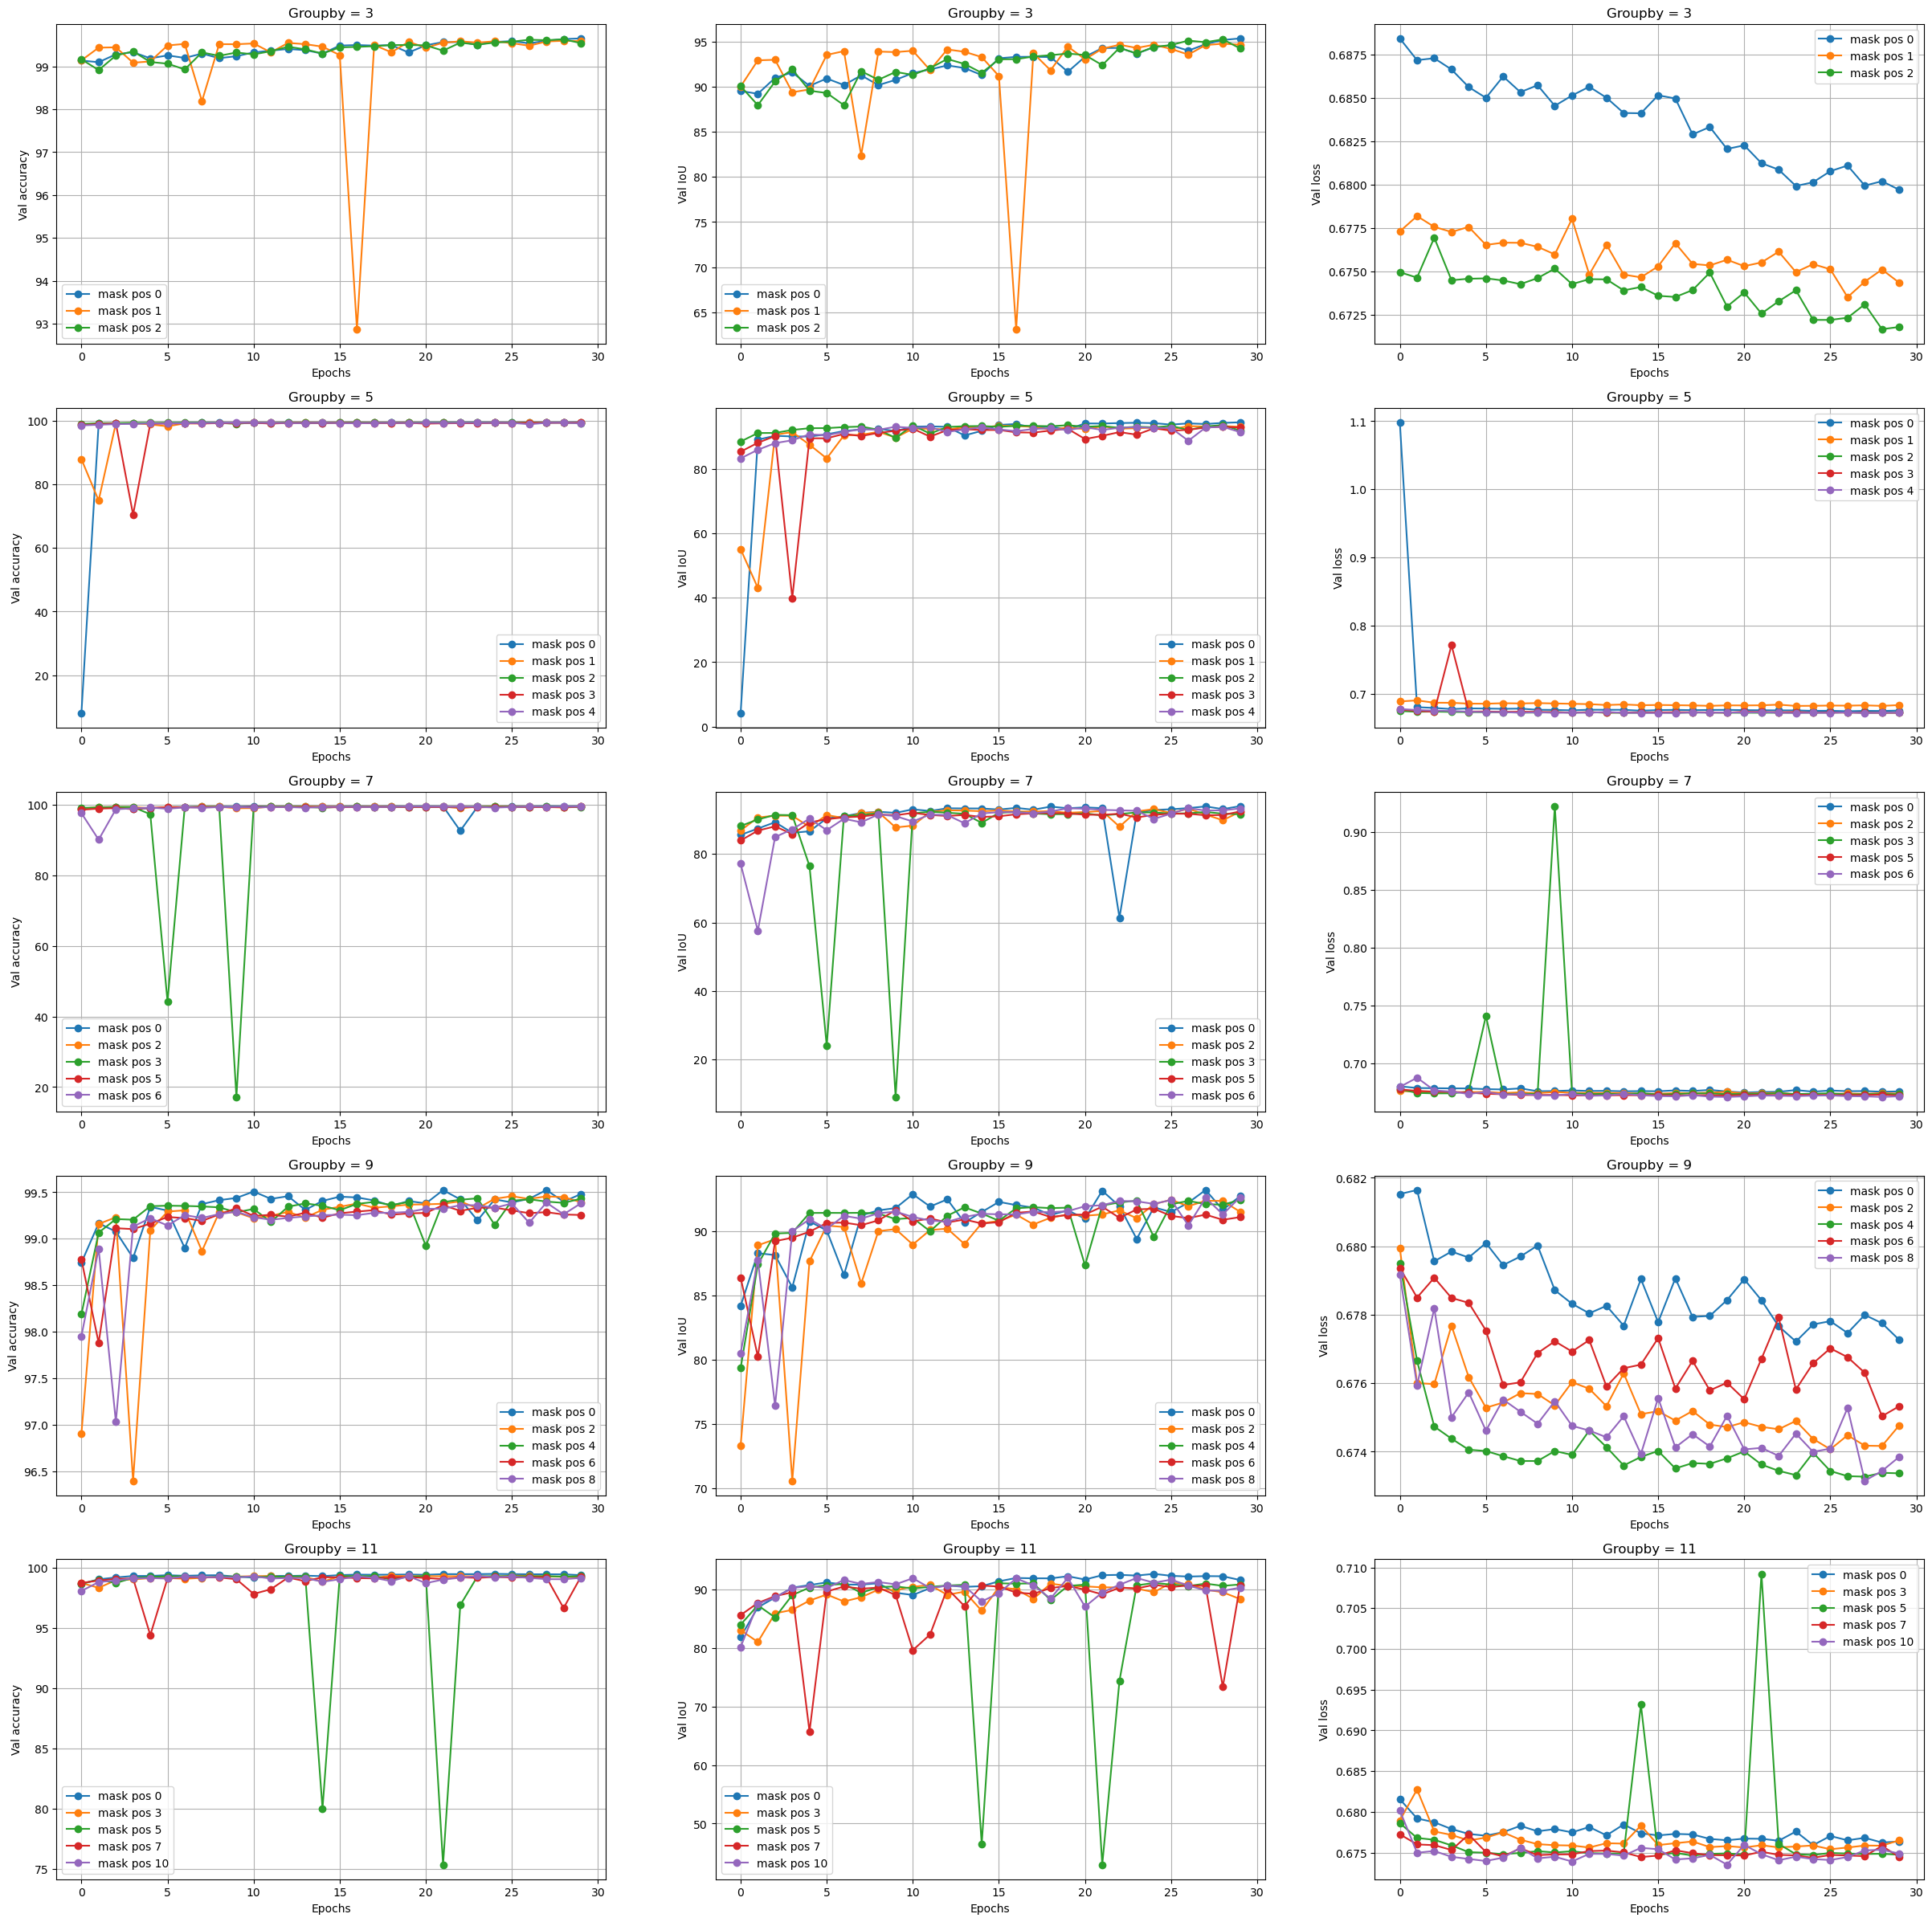

In [6]:
fig , ax = plt.subplots(len(GROUPBY_list), 3, figsize=(30,30))
for i, group in enumerate(GROUPBY_list):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)



We find the highest IoU with groupby at 3 and 7. Now let's evaluate the best mask position for these two values

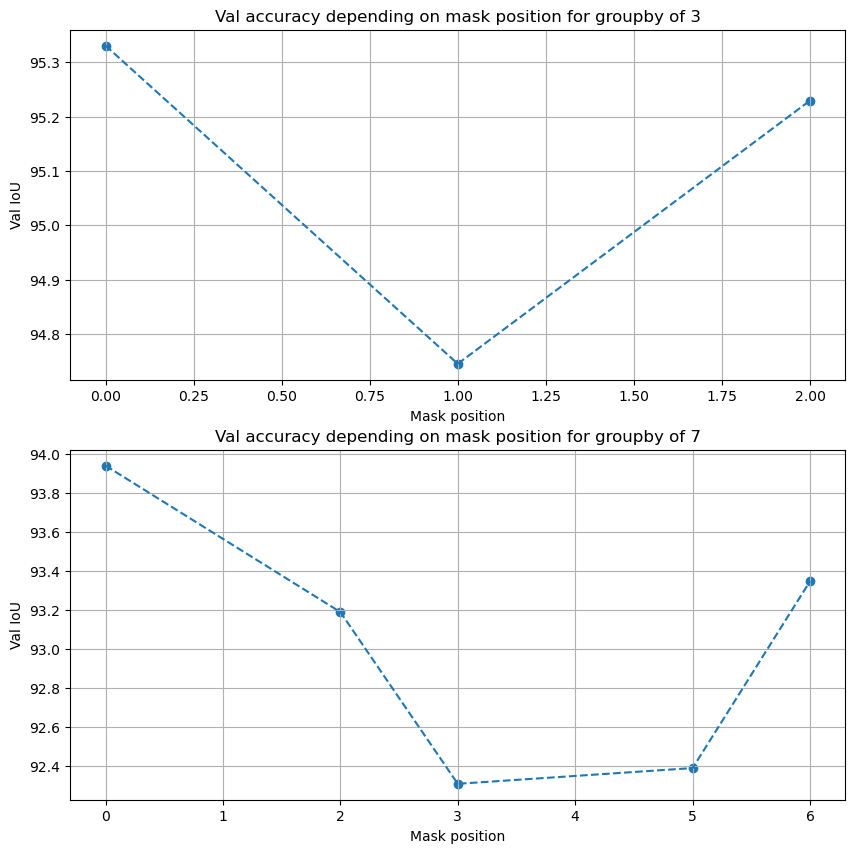

In [7]:
fig , ax = plt.subplots(2, figsize = (10,10))
groupby_sel_index = [0,2]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list[group]}")







We see that for the both value, the mask position that return the best IoU is the first one.

# Plot Result from augmented data training

In [9]:
GROUPBY_folder_augmented = ["Groupby_1_result_augmented","Groupby_3_result_augmented","Groupby_5_result_augmented","Groupby_7_result_augmented",
                                "Groupby_9_result_augmented","Groupby_11_result_augmented"  ]

GROUPBY_list_augmented = [1,3,5,7,9, 11]
ALL_MASK_list = [
            [0],
            [0,1,2],
            [0,2,4],
            [0,2,3,5,6],
            [0,2,4,6,8],
            [0,3,5,7,10]
          ]

json_groupby_augmented = []
for i, gp in enumerate(GROUPBY_list_augmented):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric_augmented.json")
    
    json_groupby_augmented.append(tmp)

In [10]:
all_result_augmented = []
for i, group in enumerate(GROUPBY_list_augmented):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder_augmented[i],json_groupby_augmented[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result_augmented.append(tmp) 

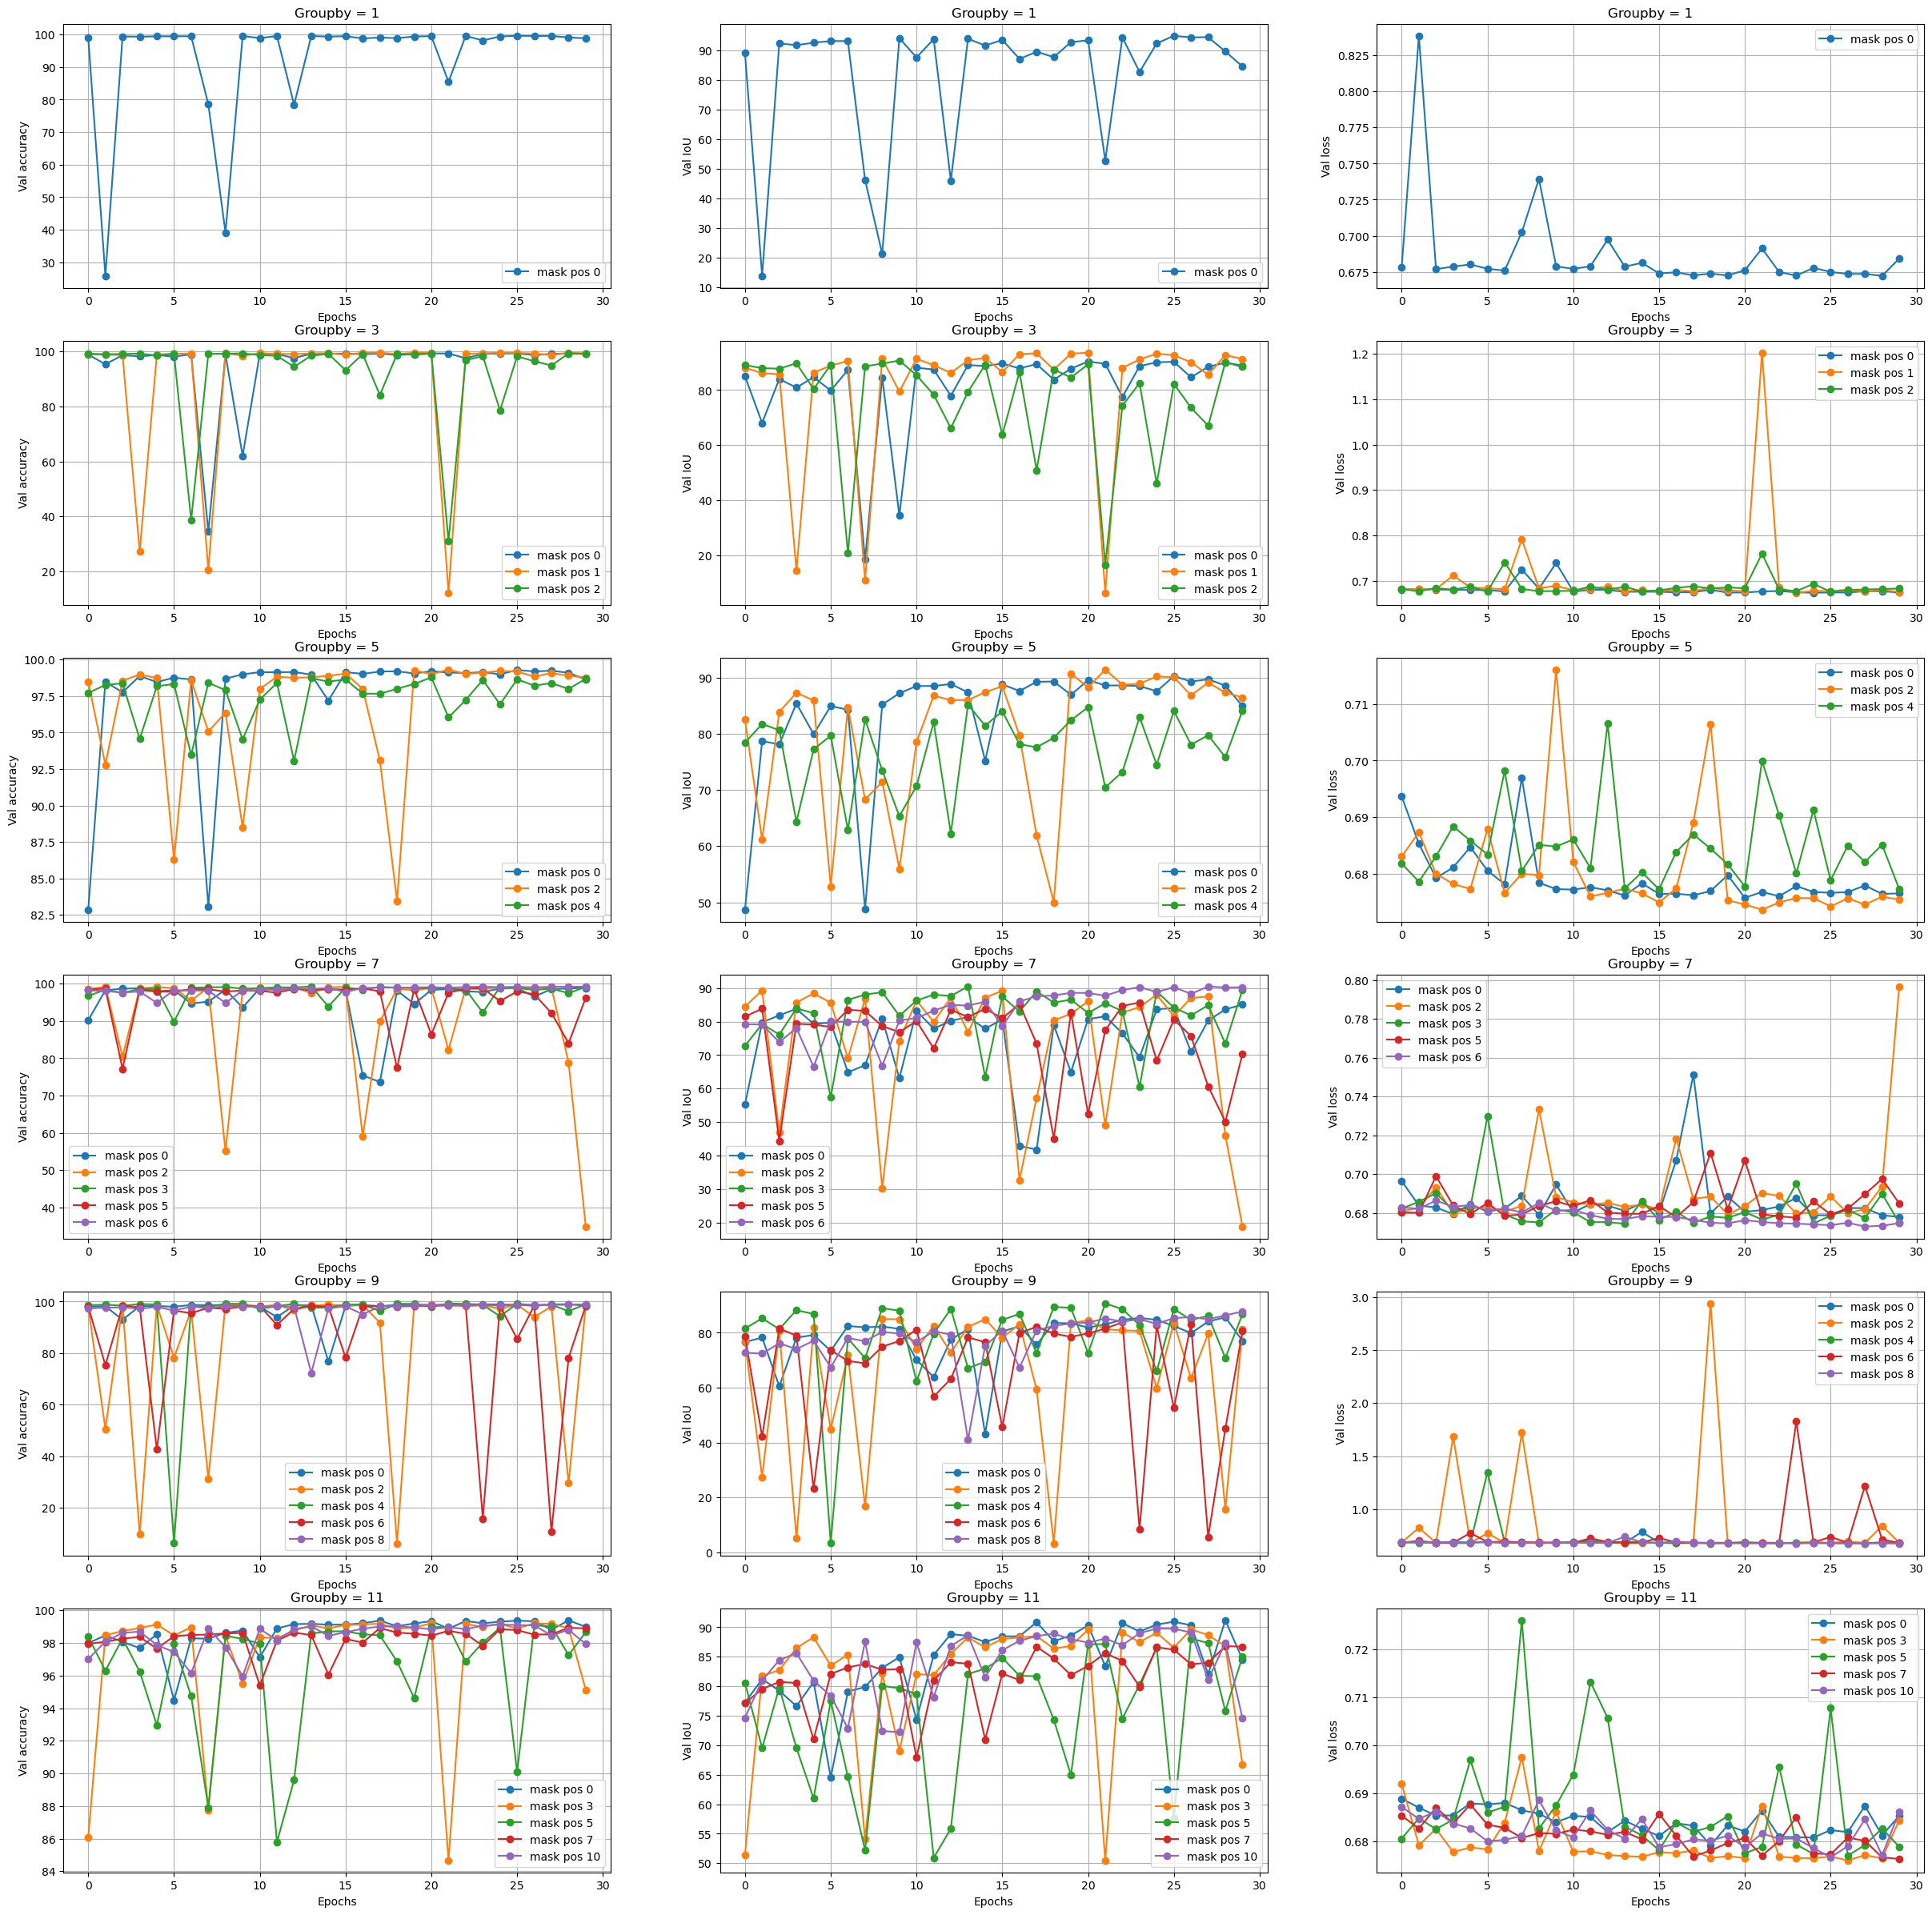

In [11]:
fig , ax = plt.subplots(len(GROUPBY_list_augmented), 3, figsize=(30,30))
for i, group in enumerate(GROUPBY_list_augmented):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result_augmented[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)


highest IoU of groupby = 1:  95.33049464225769


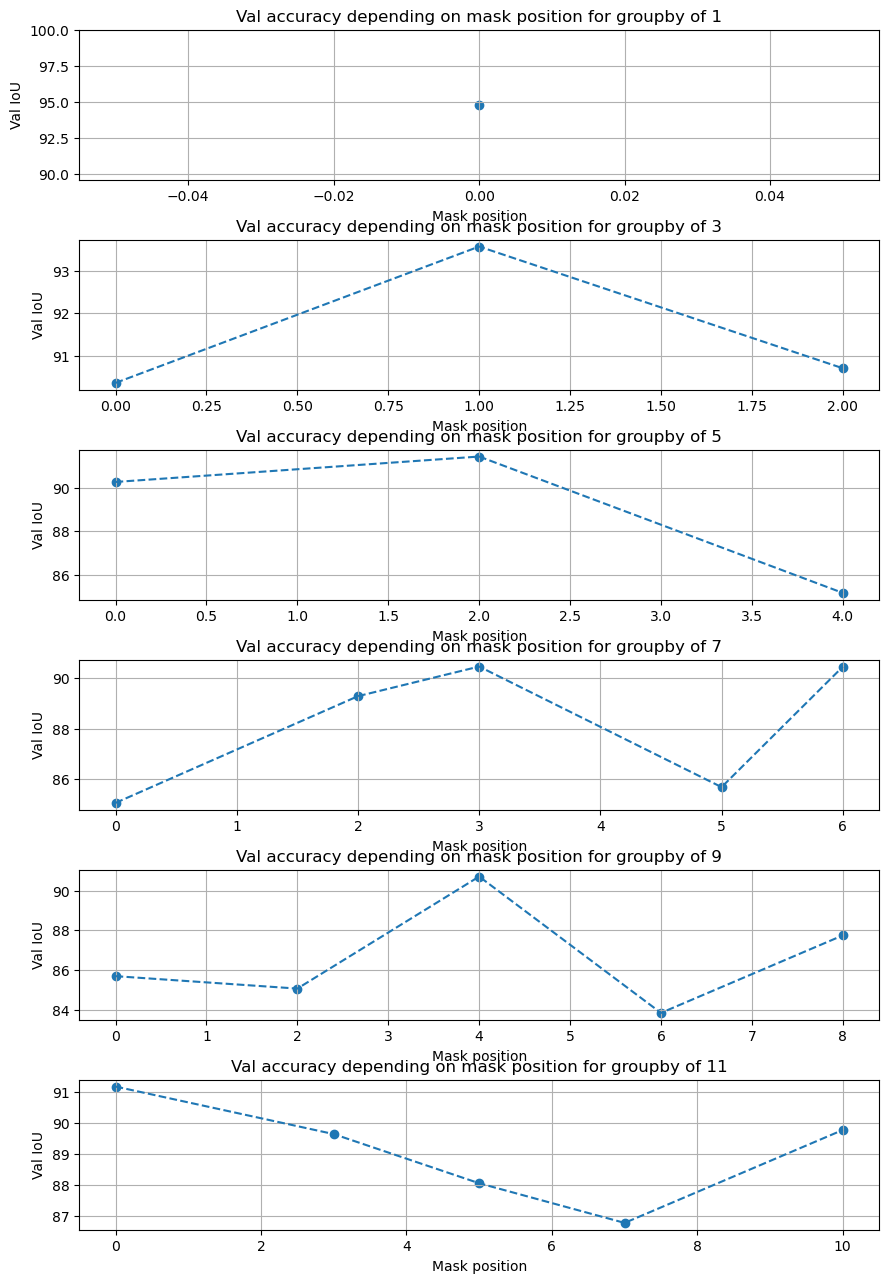

In [15]:
fig , ax = plt.subplots(6, figsize = (10,15))
groupby_sel_index = [0,1,2,3, 4, 5]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result_augmented[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list_augmented[group]}")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


print("highest IoU of groupby = 1: ", max(all_result[0][0].val_IoU))


# Plot result from groupby 5 mask position 2 and grouby 7 from maskposition 6

In [50]:
GROUPBY_folder_augmented = ["Groupby_5_result_augmented_100_epochs","Groupby_7_result_augmented_100_epochs"]
GROUPBY_list_augmented = [5,7]
ALL_MASK_list = [2,6]
json_groupby_augmented = []
for i, gp in enumerate(GROUPBY_list_augmented):
    
    json_groupby_augmented.append(f"groupby_{gp}_maskpos_{ALL_MASK_list[i]}_metric_augmented_100_epochs.json")

In [51]:
json_groupby_augmented

['groupby_5_maskpos_2_metric_augmented_100_epochs.json',
 'groupby_7_maskpos_6_metric_augmented_100_epochs.json']

In [54]:
all_result_augmented = []
for i, group in enumerate(GROUPBY_list_augmented):
    
    
    path_json = os.path.join("../result", GROUPBY_folder_augmented[i],json_groupby_augmented[i])
    with open(path_json) as json_file:
        json_data = json.load(json_file)
        df_data = pd.DataFrame.from_dict(json_data,orient='index')
    
    all_result_augmented.append(df_data) 

In [60]:
all_result_augmented[1]

,train_accuracy,train_loss,train_IoU,train_epoch_time,val_accuracy,val_loss,val_IoU,val_epoch_time
0,90.430057,0.692952,62.093091,35.231937,97.668564,0.683500,74.695963,3.235930
1,95.512038,0.675997,74.954057,32.136785,98.087704,0.684936,77.760452,3.188364
2,95.646000,0.674867,75.981402,32.376596,98.105413,0.682966,78.253675,3.334848
3,96.312374,0.672475,78.620070,32.590064,87.586898,0.698776,53.787959,3.274916
4,96.098566,0.673717,77.785164,32.508128,77.774060,0.730946,44.619542,3.234970
...,...,...,...,...,...,...,...,...
95,98.810637,0.651103,92.404318,32.579184,95.887876,0.689070,71.358418,3.225595
96,98.656726,0.650691,91.605294,32.786168,99.324727,0.672406,91.977990,3.285999
97,98.148805,0.655616,88.570178,33.210133,98.889428,0.675695,87.645704,3.283821
98,98.497301,0.650291,90.792847,33.673173,99.325961,0.672250,91.883832,3.280877


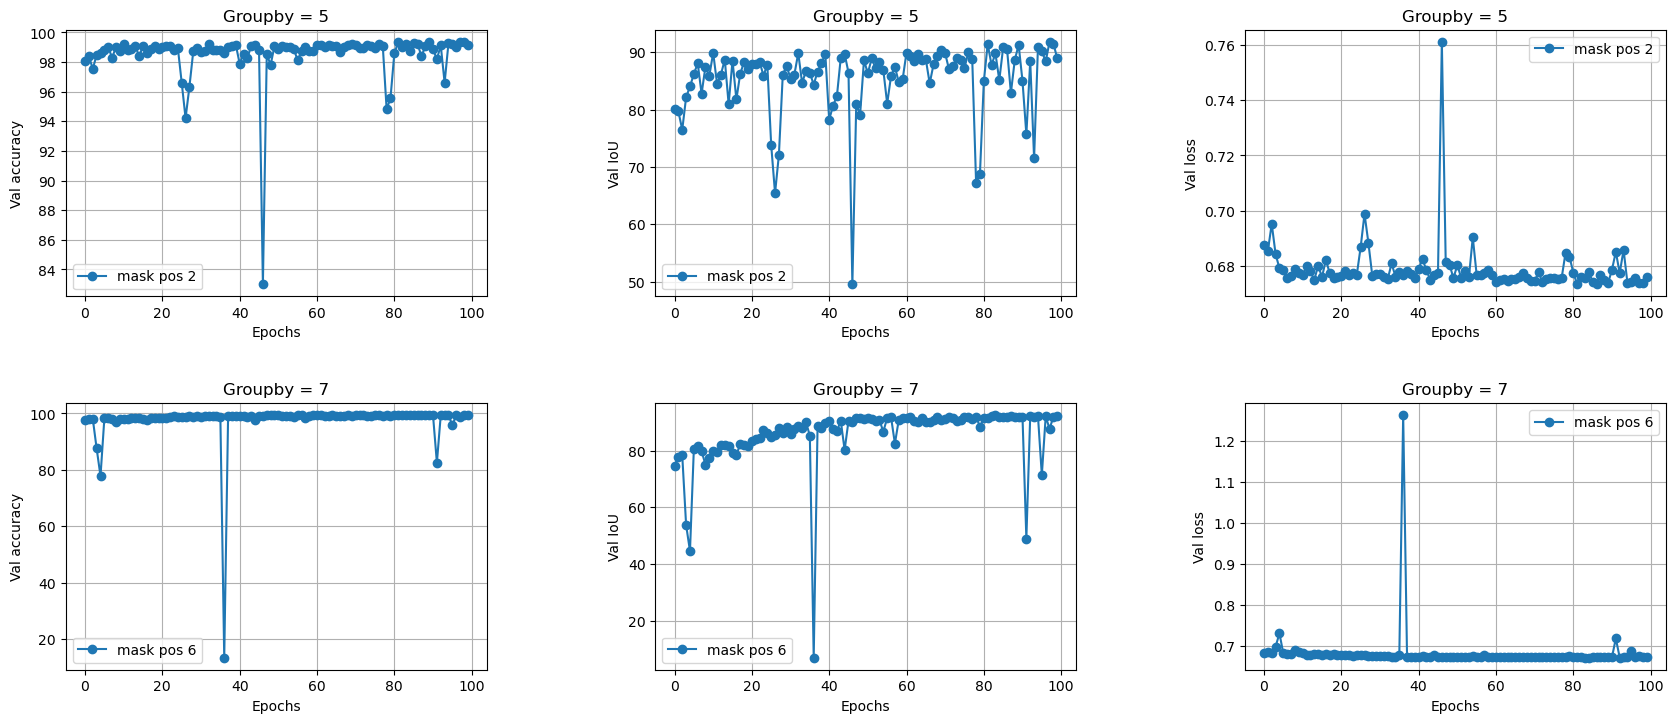

In [65]:
fig , ax = plt.subplots(len(GROUPBY_list_augmented), 3, figsize=(20,8))
for i, group in enumerate(GROUPBY_list_augmented):
    mask_pos_list = []
    
    df = all_result_augmented[i]
    df = df.reset_index()
    ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
    ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
    ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Val accuracy")
    
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Val IoU")
    
    ax3.set_xlabel("Epochs")
    ax3.set_ylabel("Val loss")

    ax1.set_title(f"Groupby = {group}")
    ax2.set_title(f"Groupby = {group}")
    ax3.set_title(f"Groupby = {group}")

    mask_pos_list.append(f"mask pos {ALL_MASK_list[i]}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



In [71]:
groupby_sel_index = [0,1]
for i, group in enumerate(groupby_sel_index):
    df = all_result_augmented[group]
    print(f"Mean Val IoU depending on mask position for groupby of {GROUPBY_list_augmented[group]} is equal to ", np.mean(df.val_IoU))

Mean Val IoU depending on mask position for groupby of 5 is equal to  85.29889982938766
Mean Val IoU depending on mask position for groupby of 7 is equal to  85.67219173908234


# Groupby 1,3 and 5 with 50 epochs and without augmentation

In [19]:
GROUPBY_folder = ["Groupby_1_result_50_epoch", "Groupby_3_result_50_epoch", "Groupby_5_result_50_epoch"]
GROUPBY_list = [1,3,5]
ALL_MASK_list = [[0],
            [0,1,2],
            [0,1,2,3,4]  
          ]


json_groupby = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric.json")
    
    json_groupby.append(tmp)

In [20]:
all_result = []
for i, group in enumerate(GROUPBY_list):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder[i],json_groupby[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result.append(tmp) 

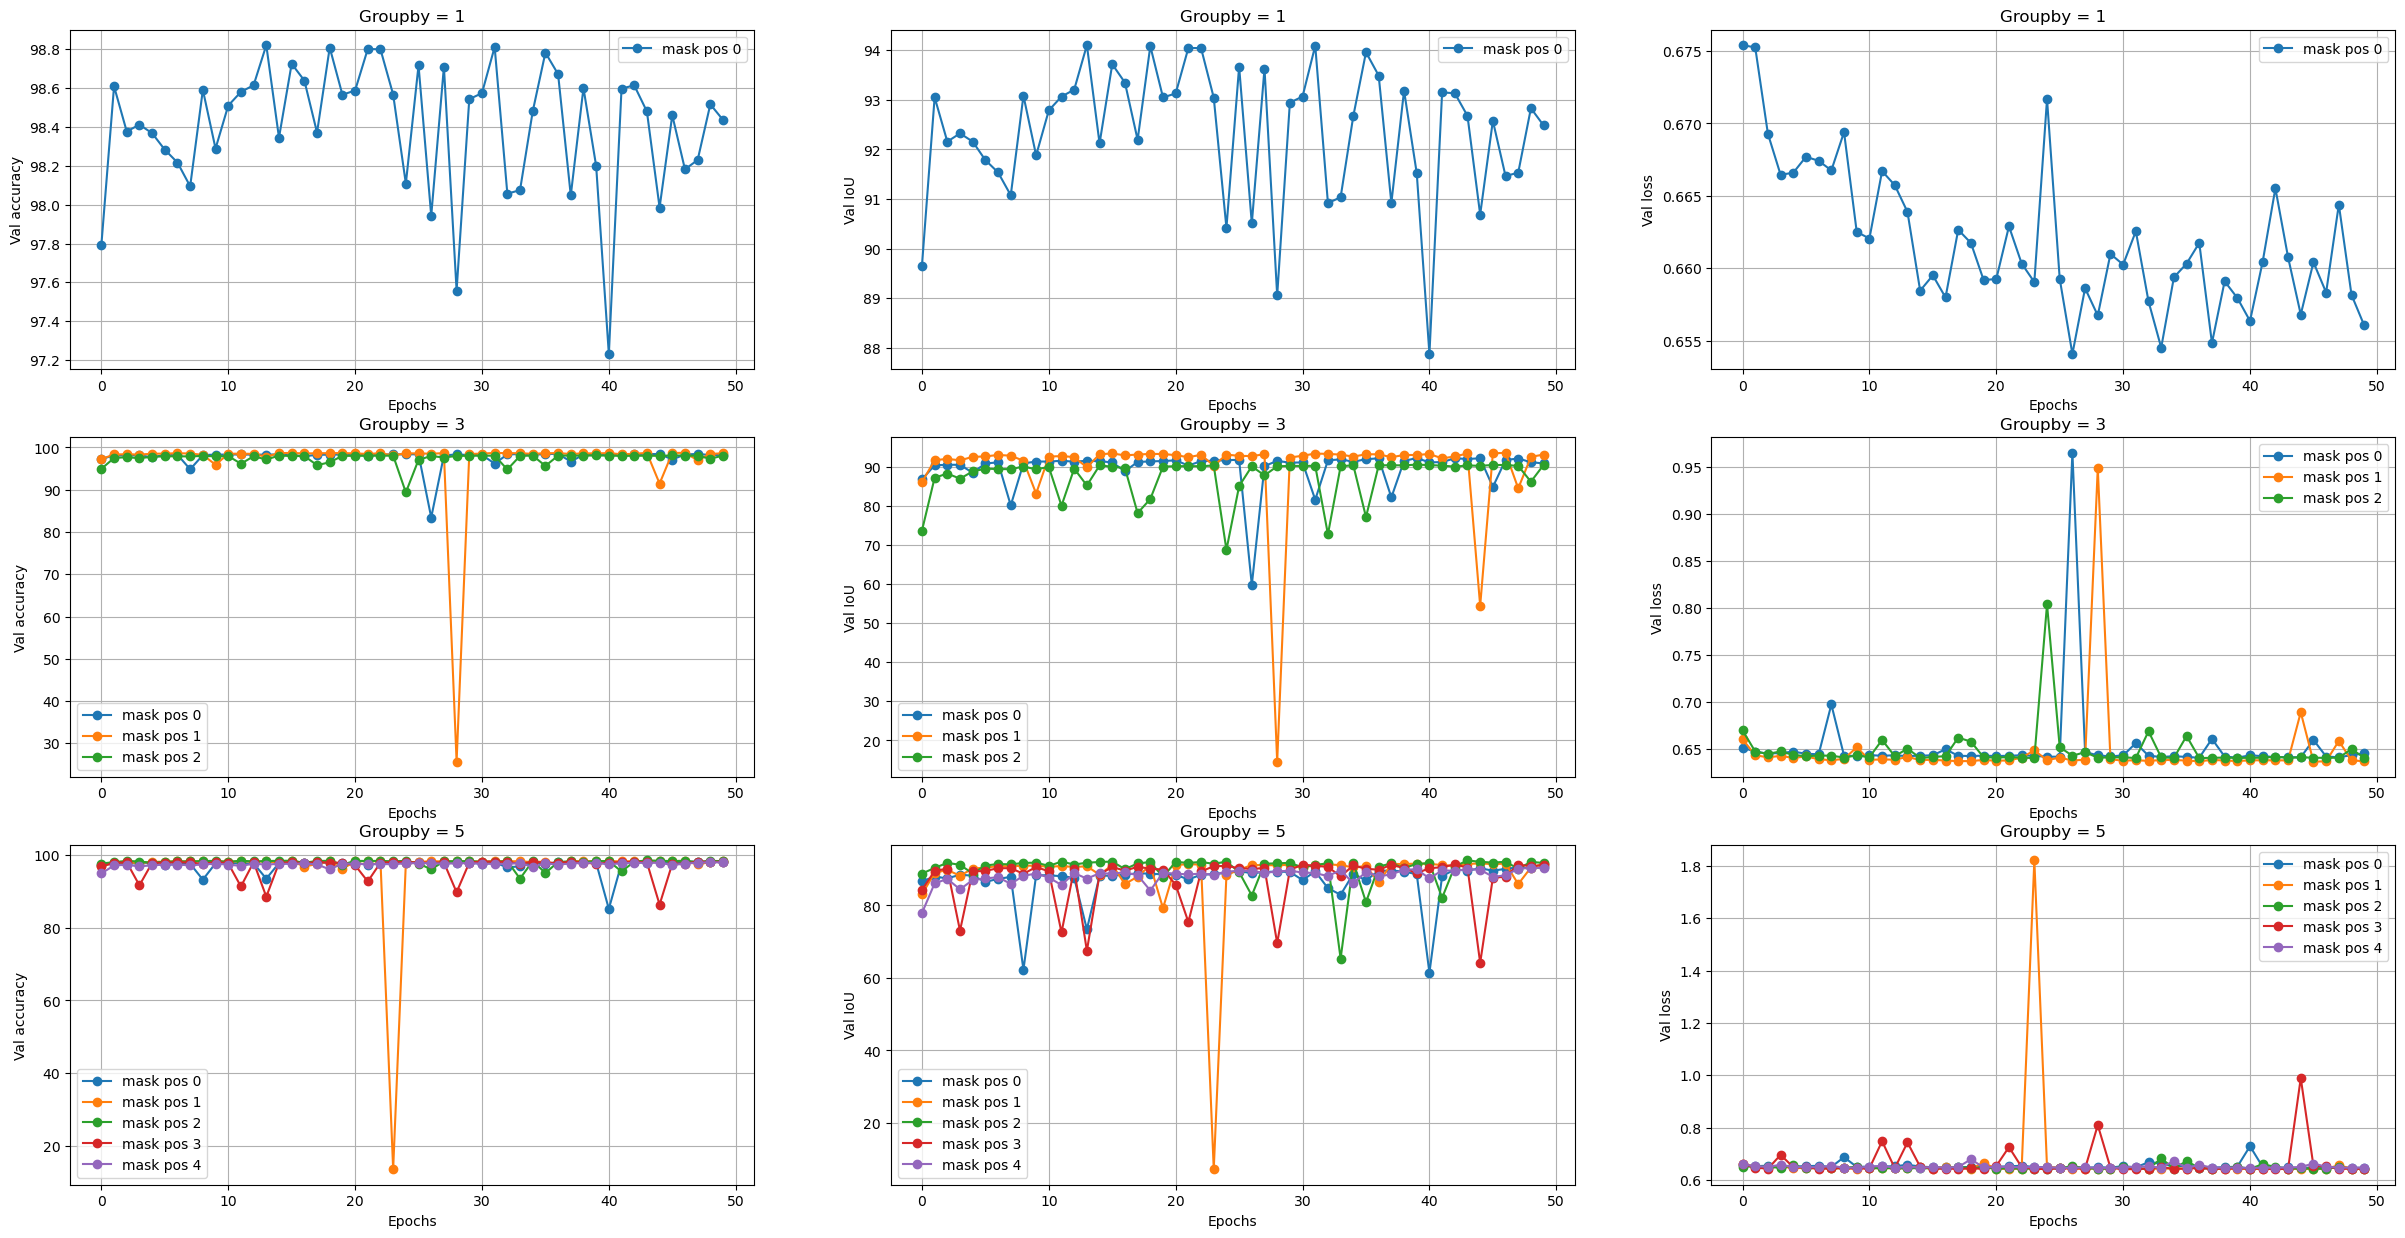

In [21]:
fig , ax = plt.subplots(len(GROUPBY_list), 3, figsize=(30,15))
for i, group in enumerate(GROUPBY_list):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)

highest IoU of groupby = 1:  94.10199522972107


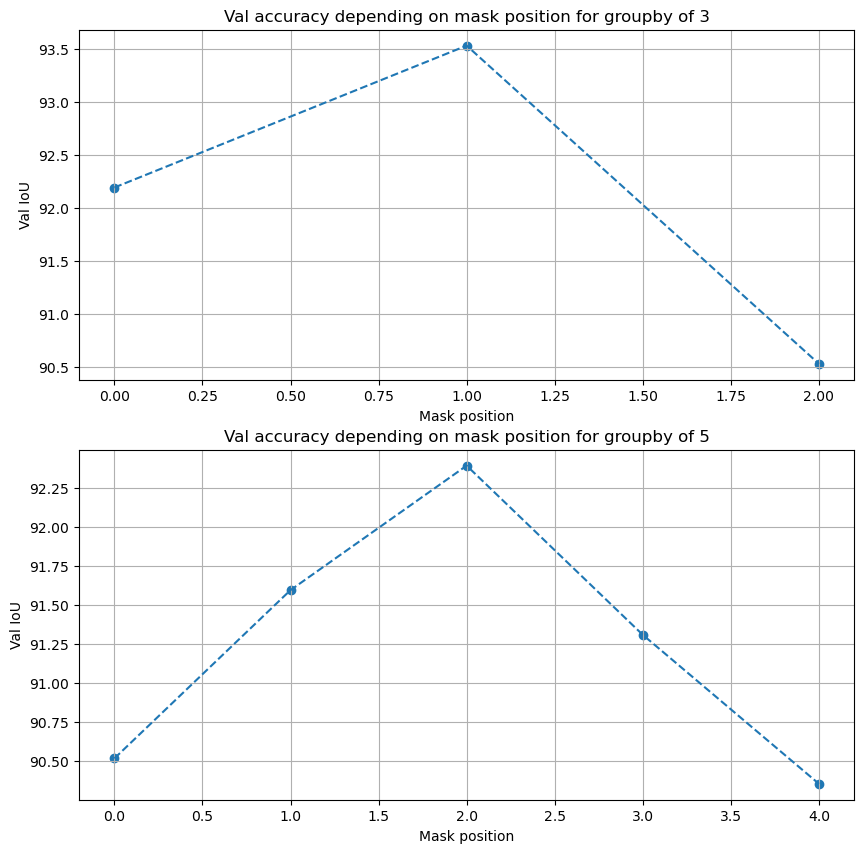

In [22]:
fig , ax = plt.subplots(2, figsize = (10,10))
groupby_sel_index = [1,2]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list[group]}")


print("highest IoU of groupby = 1: ", max(all_result[0][0].val_IoU))
